In [1]:
### packages ###
import numpy as np
import pandas as pd 
import os
import cv2
from sklearn.svm import SVC
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skimage.color import rgb2gray
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.applications import VGG16
from skimage.feature import hog
from skimage import data, exposure
import random
from keras import layers, losses
from keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import math
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from datetime import datetime

In [2]:
initial_time = datetime.now()
initial_time = initial_time.strftime("%H:%M:%S")

In [3]:
def display(img):
    plt.imshow(img)
    plt.show()

In [4]:
### Data
print("data gathering started")
#path server
#path = "/UTKFace/"
#path martim
#path = "../../../../DadosProj/UTKFace/"
#path alex
path = "../../../data_project/UTKFace/"

files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

data gathering started
Total samples: 23708
100_0_0_20170112213500903.jpg.chip.jpg


In [5]:
#### Data Pre processing
images = []
ages = []
genders = []
ethnicities = []
counter = 0

In [6]:
for file in files:
    if counter == 12500:
        break
    
    image = cv2.imread(path+file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(200, 200))
    image = image.reshape((image.shape[0], image.shape[1], 3)) ### A ausencia deste ponto  estava a causar o erro no ORB
    #image = image / 255.0 #normalizing values on each point 
    
    images.append(image)
    delimit = file.split('_')
    ages.append(int(delimit[0]))
    # first number is age (0-116 possible values)
    genders.append(int(delimit[1]))
    # second number is gender (0 for male, 1 for female)
    #ethnicities.append(int(delimit[2]))
    # third number is ethnicity (0 for white, 1 for black, 2 for asian, 3 for indian, 4 for any other ethnicity)

    counter += 1

In [7]:
print("data gathering finished")

### Age classes
print("Age Classes started")
age_classes = []
for i in ages:
    i = int(i)
    if i <= 1:
        age_classes.append(0)
    if (i>1) and (i<=13):
        age_classes.append(1)
    if (i>13) and (i<17):
        age_classes.append(2)
    if (i>=17) and (i<30):
        age_classes.append(3)
    if (i>=30) and (i<60):
        age_classes.append(4)
    if i>=60:
        age_classes.append(5)

age_labels = ["Baby",   # index 0
        "Infant",       # index 1
        "Adolescent",   # index 2 
        "Young Adult",  # index 3 
        "Adult"         # index 4
        "Old Adult",    # index 5
        ]

age_categories = to_categorical(age_classes, num_classes=6)
age_categories[:20]
print("Age Classes finished")

data gathering finished
Age Classes started
Age Classes finished


In [8]:
print(len(age_classes))
print(type(age_classes))
unique_values = list(set(age_classes))
print(unique_values)

12500
<class 'list'>
[0, 1, 2, 3, 4, 5]


BASE SVM started
(12500, 120000)
MCC:  0.7287681728611441
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1115
           1       0.88      0.88      0.88      1385

    accuracy                           0.87      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.87      0.87      0.87      2500



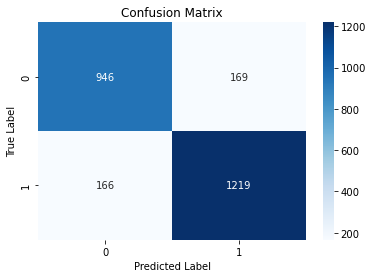

In [9]:
#### BASE
print("BASE SVM started")
flattened_images = []

for image in images:
    flattened_image = image.flatten()
    flattened_images.append(flattened_image)

flattened_images_array = np.array(flattened_images)

print(flattened_images_array.shape)

##### Gender
X_train, X_test, y_train, y_test = train_test_split(flattened_images_array, genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

###### Metrics
y_pred = clf.predict(X_test)
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC: ", mcc)
print(classification_report(y_test, y_pred))
#confusion_matrix(y_test, y_pred)
labelGender = list(set(genders))
# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)
# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelGender, yticklabels=labelGender)
# set plot labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('CM_base_SVM_gender.png')

MCC:  0.41262246053488666


c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.51      0.94      0.66       234
           1       0.00      0.00      0.00       194
           2       0.00      0.00      0.00       111
           3       0.74      0.98      0.84      1580
           4       0.00      0.00      0.00       374
           5       0.00      0.00      0.00         7

    accuracy                           0.70      2500
   macro avg       0.21      0.32      0.25      2500
weighted avg       0.52      0.70      0.60      2500

BASE SVM finished


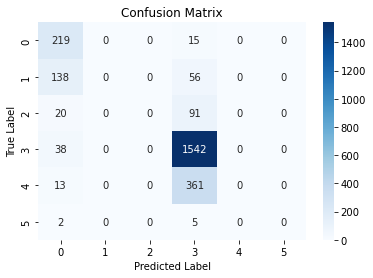

In [10]:
##### Age
X_train, X_test, y_train, y_test = train_test_split(flattened_images_array, age_categories, test_size=0.2, random_state=42)

clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)

# Convert one-hot encoded labels to integer form
y_pred = clf.predict(X_test)

y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
mcc = matthews_corrcoef(y_test_int, y_pred_int)

#accuracy = accuracy_score(y_test, y_pred)
print("MCC: ", mcc)
#print("Accuracy: ", accuracy)
print(classification_report(y_test_int, y_pred_int))
#confusion_matrix(y_test, y_pred)
labelage= list(set(age_classes))
# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test_int, y_pred_int)
# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelage, yticklabels=labelage)
# set plot labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('CM_base_SVM_age.png')

print("BASE SVM finished")


In [11]:
#### HOG
print("HOG started")
# Extract HOG features from the images
hog_features = []
for img in images:
    #hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
    #                cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, multichannel=True, channel_axis=2)
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, channel_axis=2)
    
    hog_features.append(hog_feature)
hog_features = np.array(hog_features)

# Normalize the features to have zero mean and unit variance
mean = np.mean(hog_features, axis=0)
std = np.std(hog_features, axis=0)
hog_features_norm = (hog_features - mean) / std

HOG started


MCC:  0.7549520944752827
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1115
           1       0.89      0.89      0.89      1385

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



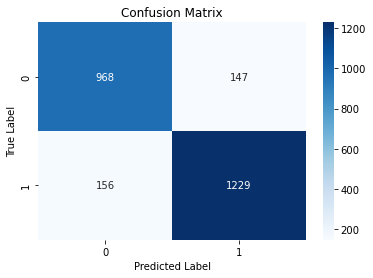

In [12]:
##### Gender
X_train, X_test, y_train, y_test = train_test_split(hog_features_norm, genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

mcc = matthews_corrcoef(y_test, y_pred)
#accuracy = accuracy_score(y_test, y_pred)
print("MCC: ", mcc)
#print("Accuracy: ", accuracy)
print(classification_report(y_test, y_pred))
#confusion_matrix(y_test, y_pred)

labelGender = list(set(genders))

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelGender, yticklabels=labelGender)

# set plot labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('CM_HOG_SVM_gender.png')

In [13]:
##### AGE
X_train, X_test, y_train, y_test = train_test_split(hog_features_norm, age_categories, test_size=0.2, random_state=42)
clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)

# Convert one-hot encoded labels to integer form
y_pred = clf.predict(X_test)

y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
mcc = matthews_corrcoef(y_test_int, y_pred_int)

#accuracy = accuracy_score(y_test, y_pred)
print("MCC: ", mcc)
#print("Accuracy: ", accuracy)
print(classification_report(y_test_int, y_pred_int))
#confusion_matrix(y_test, y_pred)
labelage= list(set(age_classes))
# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test_int, y_pred_int)
# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelage, yticklabels=labelage)
# set plot labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('CM_HOG_SVM_age.png')

print("HOG finished")


ORB Started


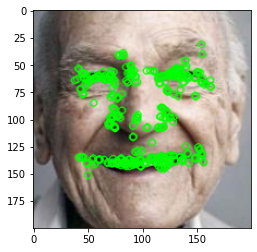

In [ ]:
#### ORB
print("ORB Started")

image_check = images[1]

orb = cv2.ORB_create()

kp = orb.detect(image_check, None)

kp, des = orb.compute(image_check, kp)

img2 = cv2.drawKeypoints(image_check, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.show()


orb = cv2.ORB_create()
# define minimum and maximum keypoints
MIN_KEYPOINTS = 100
orb_features = []
orb_genders = []
orb_ages = []

# loop over images and keypoints
for i, img in enumerate(images):
    keypoints, descriptors = orb.detectAndCompute(img, None)
    keypoints, descriptors = orb.compute(image_check, keypoints)
    keypoints = list(keypoints)    
    # check if number of keypoints is between min and max
    if len(keypoints) < MIN_KEYPOINTS:
        continue
        
    # remove extra keypoints randomly
    while len(keypoints) > MIN_KEYPOINTS:
        idx = random.randint(0, len(keypoints)-1)
        keypoints.pop(idx)
        descriptors = np.delete(descriptors, idx, axis=0)
        
    # add descriptors to feature list
    orb_features.append(np.ndarray.flatten(descriptors))
    orb_genders.append(genders[i])
    orb_ages.append(age_categories[i])

mean = np.mean(orb_features, axis=0)
std = np.std(orb_features, axis=0)
orb_features_norm = (orb_features - mean) / std

MCC:  0.0
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.00      0.00      0.00         2

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


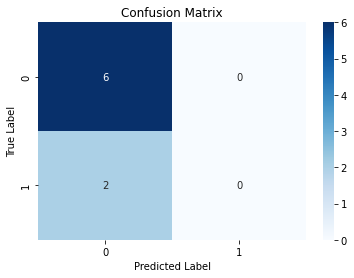

In [ ]:
##### Gender
X_train, X_test, y_train, y_test = train_test_split(orb_features_norm, orb_genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing data
y_pred = clf.predict(X_test)

mcc = matthews_corrcoef(y_test, y_pred)
#accuracy = accuracy_score(y_test, y_pred)
print("MCC: ", mcc)
#print("Accuracy: ", accuracy)
print(classification_report(y_test, y_pred))
#confusion_matrix(y_test, y_pred)

labelGender = list(set(genders))

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelGender, yticklabels=labelGender)

# set plot labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('CM_ORB_SVM_gender.png')

c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefined

MCC:  0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       6.0
           5       0.00      0.00      0.00       2.0

    accuracy                           0.00       8.0
   macro avg       0.00      0.00      0.00       8.0
weighted avg       0.00      0.00      0.00       8.0

ORB Finished


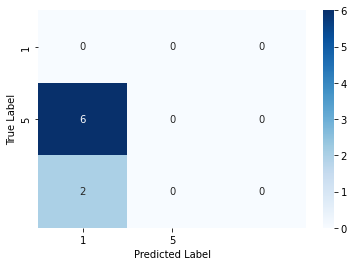

In [ ]:
##### AGE
X_train, X_test, y_train, y_test = train_test_split(orb_features_norm, orb_ages, test_size=0.2, random_state=42)

clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
mcc = matthews_corrcoef(y_test_int, y_pred_int)

#accuracy = accuracy_score(y_test, y_pred)
print("MCC: ", mcc)
#print("Accuracy: ", accuracy)
print(classification_report(y_test_int, y_pred_int))
#confusion_matrix(y_test, y_pred)
labelage= list(set(age_classes))
# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test_int, y_pred_int)
# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelage, yticklabels=labelage)
# set plot labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('CM_ORB_SVM_age.png')
print("ORB Finished")

In [ ]:
print("VGG Started")
#### VGG16
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

for layer in VGG_model.layers:
	layer.trainable = False
	
VGG_model.summary()

X = np.stack(images)
X = VGG_model.predict(X)

VGG Started
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128) 

MCC:  0.0
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


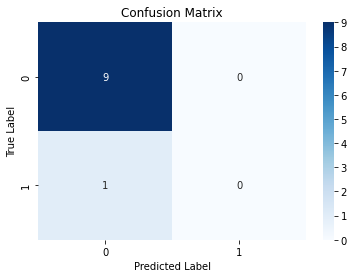

In [ ]:
##### Gender
X_svm = X.reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X_svm, genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing data
y_pred = clf.predict(X_test)

mcc = matthews_corrcoef(y_test, y_pred)
#accuracy = accuracy_score(y_test, y_pred)
print("MCC: ", mcc)
#print("Accuracy: ", accuracy)
print(classification_report(y_test, y_pred))
#confusion_matrix(y_test, y_pred)

labelGender = list(set(genders))

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelGender, yticklabels=labelGender)

# set plot labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('CM_VGG_SVM_gender.png')


c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefined

MCC:  0.3061862178478973
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.86         8
           5       0.00      0.00      0.00         2

    accuracy                           0.60        10
   macro avg       0.33      0.25      0.29        10
weighted avg       0.80      0.60      0.69        10

VGG Finish


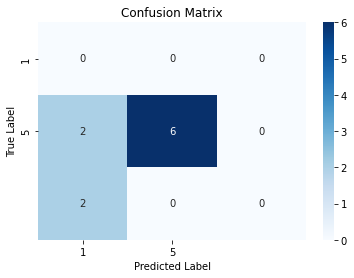

In [ ]:
#### AGE
X_train, X_test, y_train, y_test = train_test_split(X_svm, age_categories, test_size=0.2, random_state=42)#variar a percentagem split

clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)

# Convert one-hot encoded labels to integer form
y_pred = clf.predict(X_test)

y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
mcc = matthews_corrcoef(y_test_int, y_pred_int)

#accuracy = accuracy_score(y_test, y_pred)
print("MCC: ", mcc)
#print("Accuracy: ", accuracy)
print(classification_report(y_test_int, y_pred_int))
#confusion_matrix(y_test, y_pred)
labelage= list(set(age_classes))
# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test_int, y_pred_int)
# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelage, yticklabels=labelage)
# set plot labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('CM_VGG_SVM_age.png')

print("VGG Finish")

In [ ]:
print("Autoencoder Started")
#### AUtoencoder
input = layers.Input(shape=(200, 200, 3))

#valor alto apanha artefactos, e valor baixo nao captura bem as features da imagem
latent_dim = 2000

## Classe 

# Encoder

#didnt increase filter count in encoder and decrease equally in decoder because
#it can lead to overfitting

x = layers.Conv2D(64, (3,3), activation='relu', padding='same', strides = 2)(input)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#dividir imagem por factor de 2
x = layers.Conv2D(32, (3,3), activation='relu', padding='same', strides = 2)(x)#reduziu se nr de filtros para 32 porque foi decidido factor de 32 filtros
#x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#25*25*16=10000
x = layers.Flatten()(x)
enc = layers.Dense(latent_dim, activation='relu')(x)

# Decoder

#having conv2D here helps to avoid checkerboard artifacts
#which are alternating points of colors (like checkerboard)
#that are consequence of deconvolutioning an image and cause 
#loss of quality in final reconstruction
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)

#equivalente a fazer dense layer no fim do encoder e no inicio do decoder
#fazer a layer dense fica um vector
#fazer reshape depois do 2 dense para voltar a ter imagem do vetor criado

x = layers.Dense(25*25*16, activation='relu')(enc)
x = layers.Reshape((25,25,16))(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same", strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
output = layers.Conv2DTranspose(3, (3,3), activation='sigmoid', padding='same', strides = 2)(x)

#maybe use strides in the layers too
#example:
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)

# Autoencoder
autoencoder = Model(input, output)

# binary cross entropy is good for image feature extraction especially when images are normalized
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
#autoencoder.summary()

print("svm encoder for gender started")

Autoencoder Started
svm encoder for gender started


In [ ]:
print("svm encoder for gender started")

##### Gender
X_train, X_test, y_train, y_test = train_test_split(images, genders, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))


# binary cross entropy is good for image feature extraction especially when images are normalized
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

#using validation_data is good for detecting overfitting as 
#it does early stopping when the performance is no longer improving

autoencoder.fit(x = X_train, 
                y = X_train,
                epochs = 2,
                shuffle = True,
                batch_size = 32,
                validation_data = (X_test, X_test),)

new_model = Model(input, enc)

pred_train = new_model.predict(X_train)
pred_test = new_model.predict(X_test)

encoded_X_train = pred_train.reshape((pred_train.shape[0], -1))
encoded_X_test = pred_test.reshape((pred_test.shape[0], -1))

svm encoder for gender started
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      1792      
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 16)        4624      
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 2000)              20002000  
                                                                 
 dense_3 (Dense)            

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      1792      
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 16)        4624      
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 2000)              20002000  
                                                                 
 dense_3 (Dense)             (None, 10000)             2001

c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


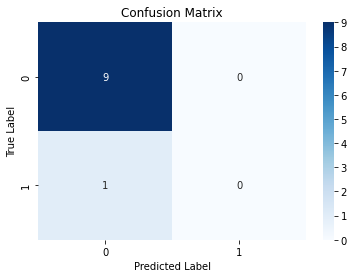

In [ ]:
##### Gender
X_train, X_test, y_train, y_test = train_test_split(images, genders, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))


# binary cross entropy is good for image feature extraction especially when images are normalized
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

#using validation_data is good for detecting overfitting as 
#it does early stopping when the performance is no longer improving

autoencoder.fit(x = X_train, 
                y = X_train,
                epochs = 2,
                shuffle = True,
                batch_size = 32,
                validation_data = (X_test, X_test),)

new_model = Model(input, enc)

pred_train = new_model.predict(X_train)
pred_test = new_model.predict(X_test)

encoded_X_train = pred_train.reshape((pred_train.shape[0], -1))
encoded_X_test = pred_test.reshape((pred_test.shape[0], -1))

clf = SVC()
clf.fit(encoded_X_train, y_train)

# Evaluate the classifier on the testing data
y_pred = clf.predict(encoded_X_test)

mcc = matthews_corrcoef(y_test, y_pred)
#accuracy = accuracy_score(y_test, y_pred)
print("MCC: ", mcc)
#print("Accuracy: ", accuracy)
print(classification_report(y_test, y_pred))
#confusion_matrix(y_test, y_pred)

labelGender = list(set(genders))

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelGender, yticklabels=labelGender)

# set plot labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('CM_AE_SVM_gender.png')

svm encoder for age started
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      1792      
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 16)        4624      
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 2000)              20002000  
                                                                 
 dense_3 (Dense)             (N

c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefined

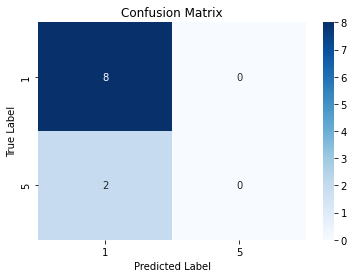

In [ ]:
#### AGE
print("svm encoder for age started")
X_train, X_test, y_train, y_test = train_test_split(images, age_categories, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))

# binary cross entropy is good for image feature extraction especially when images are normalized
autoencoder.compile(optimizer="adam", loss='categorical_crossentropy')
autoencoder.summary()


autoencoder.fit(x = X_train, 
                y = X_train,
                epochs = 2,
                shuffle = True,
                batch_size = 32,
                validation_data = (X_test, X_test),
)

new_model = Model(input, enc)

pred_train = new_model.predict(X_train)
pred_test = new_model.predict(X_test)


encoded_train = pred_train.reshape((pred_train.shape[0], -1))
encoded_test = pred_test.reshape((pred_test.shape[0], -1))

clf = OneVsRestClassifier(SVC())
clf.fit(encoded_train, y_train)

# Convert one-hot encoded labels to integer form
y_pred = clf.predict(encoded_test)

y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
mcc = matthews_corrcoef(y_test_int, y_pred_int)

#accuracy = accuracy_score(y_test, y_pred)
print("MCC: ", mcc)
#print("Accuracy: ", accuracy)
print(classification_report(y_test_int, y_pred_int))
#confusion_matrix(y_test, y_pred)
labelage= list(set(age_classes))
# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test_int, y_pred_int)
# create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelage, yticklabels=labelage)
# set plot labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('CM_AE_SVM_age.png')
